# Support Vector Classification (SVC)

A Support Vector Machine (SVM) is a machine learning algorithm that is used primarily for classification (although it can be used for regression). Remember that classification is used to determine categorical variables, whereas regression is used to determine numeric (continuous) variables.  

If you have two different classes in your dataset, there are many ways you can draw lines/hyperplanes to separate them that might "correctly" classify your training data. SVM aims to maximize the distance between the data points of each class and the decision boundary, be it line or hyperplane. 

## How SVC Works

SVM finds a line or hyperplane in n-dimensional space that distinctly classifies data points, if you are asking a yes/no question with SVM, yes would be on one side of your line (in 2D) or hyperplane (in nD) and no would be on the other. 


## SVM Decision Boundary

SVM tries to find the best line or hyperplane in a way that minimized the distance between the hyperplane and support vectors. Support vectors are the points NEAREST to the decision boundary. KNN doesn't have a hyperplane, it classifies data based on what the known points nearest to the point in question are and  logistic regression adjusts decision boundaries and weights of inputs in order to create a decision boundary. 

See figure below for a visual demonstration.


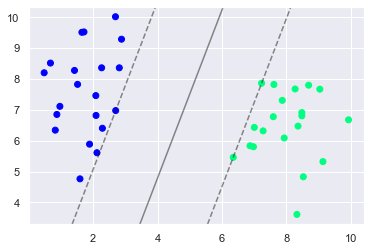

In [96]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn import svm
from sklearn.datasets import make_blobs

#make points
X, y = make_blobs(n_samples=40, centers=2, random_state =20)


method = svm.SVC(kernel='linear', C=1)
method.fit(X,y)

sns.set(style='darkgrid')
plt.scatter(X[:,0], X[:,1], c=y, cmap='winter')

ax = plt.gca()
xlim=ax.get_xlim()
ylim=ax.get_ylim()

xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = method.decision_function(xy).reshape(XX.shape)

ax.contour(XX, YY, Z, colors='k', levels=[-1,0,1],
          alpha=0.5,
          linestyles=['--','-','--'])


## What if there's not an obvious Decision Boundary?

SVM is easy to visualize when your data is easily separated, but it appears to break down when your data is mixed up. This is where the Kernel Funciton comes in.

A kernel augments data with nonlinear features that are derived from the existing data and then finds a separating hyperplane for the new derived data before projecting this separation back onto the original data. That's a long sentecne and pretty confusing, let me demonstrate visually.

The most simplistic dataset I can run on is a 1 dimensional dataset. My dataset has values of 1-8, with 1-2 and 7-8 beloning to one class and 4-6 belonging to another. There isn't a place for a decsion boundary in one dimension.


<AxesSubplot:xlabel='x'>

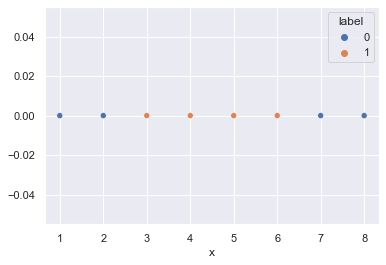

In [97]:
data = {'x' : [1,2,3,4,5,6,7,8],
        'label' : [0,0,1,1,1,1,0,0]
       }
df = pd.DataFrame(data)
y = 0
sns.set(style='darkgrid')
sns.scatterplot(data=df, x=df['x'], y=y, hue=df['label'])


### Where's the Decision Boundary

Looking at the data above, there's not an obvious decision boundary. There is no place that I can draw a line or a plane in order to separate the data. What I need to do is transform the data provided in another dimension and draw a line/hyperplane in that dimension and then transpose the boundary in that dimension onto my current data. 

This is an easy transformation in that I can do it by hand, I add a "y" dimension and get my "y" value by squaring the x value.

,x,label,y
0,1,0,1
1,2,0,4
2,3,1,9
3,4,1,16
4,5,1,25
5,6,1,36
6,7,0,49
7,8,0,64


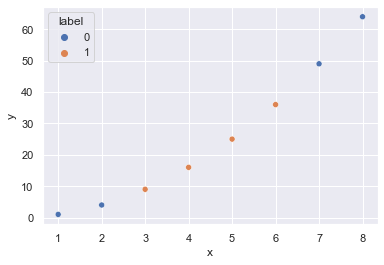

In [98]:
df['y'] = df['x']**2
sns.scatterplot(data=df, x=df['x'], y=df['y'], hue=df['label'])

df.head(9)

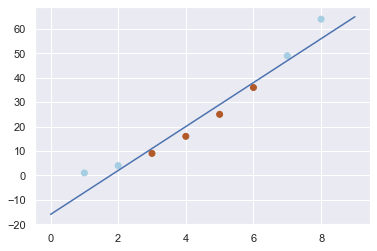

In [99]:
X = df.drop(columns=['label'])
y=df['label']
svc = svm.SVC(kernel='linear', C=100).fit(X, y)
w = svc.coef_[0]
b = svc.intercept_[0]
x_points = np.linspace(0, 9)
y_points = -(w[0]/w[1])*x_points - b/w[1]
plt.scatter(df['x'], df['y'], c=df['label'], cmap=plt.cm.Paired)
plt.plot(x_points, y_points, c='b')

### SVM Decision Boundary Projection

Now the decision boundary is projected from two dimensions back onto one dimension and this decision boundary is used to determine where future points would fall based off of this model.

This was an incredibly simple transformation, the kernel function that is present in SVM can do far more complex transformations.

## Important SVM Parameters

As models get more complex, the amount of model parameters or hyperparamaters increases. SVM has a regularization parameter called C as well as a choice between L1 and L2 regulazization. The final important parameter is the kernel which allows you to change from Linear SVMs to an algorithm that is better with non-linear data.
 

### The C Parameter

C is the regularization parameter for SVM. A smaller value of C means a simpler model than a large value for C. SVM can have either a hard margin or a soft margin. A hard margin tolerates less misclassification whereare a soft margin allows the model to misclassify a few data points if it can lead to better generalization of unseen data.

How "hard" a margin is is based off the C parameter, the higher the C, the more penalty the algorithm gets when making a misclassification.

### L1 Vs. L2 regularization

L1 is used as a regularization parameter if only a few features are important. If you have a lot of features and they share similar importance, its better to choose L2 regularization.

### Kernel Selection

Kernel selection parameters are the most important hyperparameters for SVM. When you cannot separate the data with a line or hyperplane, a kernel trick must be done on the data. A kernel trick does automatically what I did manually on the data above, it maps non-linear data onto higher dimensional spate where our data is separatable and where SVM can be implemented before projectin the higher dimensional line or hyperparameter back onto our normal space.

There are four types of kernels:
- Linear
- Polynomial
- Sigmoin
- Radial Basis Function (RBF)

Additionally besides kernel type there is the gamma value and degree.

### Gamma

Gamma is the kernel coefficient for RBF, Polynomial, and sigmoir kernels. Gamma specifies the extent to which the kernel effects the model.

### Degree

Degree is specifically for polynomial kernels, it specifies the degree of polynomial implemented with the kernel function.

## The Kernel Trick

Testing out a bunch of higher dimensional transformations is very computationally expensive. It would be, if that's what you were doing. Instead of actaully performing transformations the SVM algorithm represents the data through a set of pariwise similary comparisons between original data. That's the extent to which I'm going to get into the Kernel trick in this summary, the important this is that it works.

## Advantages/Disadvantages of SVM

SVM is easy to understand, implement, use and interpret. SVM is very good at working in high dimensional space. Avoids underfitting/overfitting with the normalization parameter. 

### Advantages
- Easy to understand, implement, and interpret
- Good ar working with high dimensional datasets

SVM is computationally expensive, so with big datasets, its not what you should use.  SVM on 10,000 samples is fine, 100,000 not so much. SVM also needs data to be carefully preprocessed and normalized prior to implementation. 

### Disadvantages
- COmputationally expensive
- Limit to dataset size
- Requires proper pre-processing
- Parameters need to be tuned well

## Running SVM

I'm going to be running SVM on one of the "classic" data science datasets, trying to determine penguin gender from other information about the penguin.

### Loading the Data Set

Loading penguin data from seaborn, dropping NA values and displaying the first 5 columns.

In [100]:
df = sns.load_dataset('penguins')
df.dropna(axis=0, how='any', inplace=True)
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male


### Data Munging

Splitting into categorical/numerical data and assigning numerical values to difference categorical values.

In [101]:
#lists of categoricals/numerics
categorical = ['species','island','sex']
numeric = ['bill_length_mm','bill_depth_mm','flipper_length_mm','body_mass_g']

#using pandas categorical method with .codes
df['species']=pd.Categorical(df['species']).codes

#using replace
df['island'].replace(['Torgersen','Biscoe','Dream'],[0,1,2], inplace=True)

#using get dummies
df['sex'] = pd.get_dummies(df['sex'], drop_first=True)

### Scaling Data

Transforming the data into a uniform scale of 0-1 and verifying.

In [102]:
X = df.drop('sex', axis=1)
y=df['sex']

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
data = scaler.fit_transform(X)
X_scaled = pd.DataFrame(data)

X_scaled.head()

,0,1,2,3,4,5
0,0.0,0.0,0.254545,0.666667,0.152542,0.291667
1,0.0,0.0,0.269091,0.511905,0.237288,0.305556
2,0.0,0.0,0.298182,0.583333,0.389831,0.152778
3,0.0,0.0,0.167273,0.738095,0.355932,0.208333
4,0.0,0.0,0.261818,0.892857,0.305085,0.263889


## SVM Algorithm Exploration and Analysis

Loading the algorithm from SKlearn. 

class sklearn.svm.SVC(*, C=1.0, kernel='rbf', degree=3, gamma='scale', coef0=0.0, shrinking=True, probability=False, tol=0.001, cache_size=200, class_weight=None, verbose=False, max_iter=-1, decision_function_shape='ovr', break_ties=False, random_state=None)

- C, the regulalization parameter
- kernel, the kernel type (linear, poly, rbj, sigmoid)
- degree, the degreee of polynomial for polynomial kernel funciton
- gamma, kernel coeffiienc for poly, rbj or sigmoid

Full documentation available here: https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html

In [103]:
#train/test/split
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X_scaled,y,test_size=0.25,random_state=1) 

from sklearn import svm
method = svm.SVC()

method.fit(X_train, y_train)

predictions = method.predict(X_test)

In [104]:
from sklearn.metrics import accuracy_score
a_score = str(round(accuracy_score(y_test, predictions),3))
print('Accuracy Score:  '+ a_score)

Accuracy Score:  0.893


### Normalization Parameter (C Value) Analysis

The default value for C is 1.0, the default values for kernel is rbf and the default gamma is number of features-1 (6-1) = 5.

Let's try hyperparameter tuning.

I'm going to start with C. I'm just creating a list of C values, and see how accuracy scores change as C values change.

In [105]:
c_list = []
accuracy_scores = []
for c in [0.001, 0.01, 0.1, 1, 10, 100, 1000]:
    method = svm.SVC(C=c)
    method.fit(X_train, y_train)
    predictions = method.predict(X_test)
    a_score = str(round(accuracy_score(y_test, predictions),3))
    c_list.append(c)
    accuracy_scores.append(a_score)

df_c = pd.DataFrame(c_list)
df_c['Accuracy Score'] = accuracy_scores
df_c = df_c.rename(columns = {0:'C Value'})
df_c['Accuracy Score'] = df_c['Accuracy Score'].astype(float)
df_c['C Value'] = df_c['C Value'].astype(object)

df_c.head(10)

,C Value,Accuracy Score
0,0.001,0.429
1,0.01,0.429
2,0.1,0.750
3,1.0,0.893
4,10.0,0.881
5,100.0,0.869
6,1000.0,0.869


<AxesSubplot:xlabel='C Value', ylabel='Accuracy Score'>

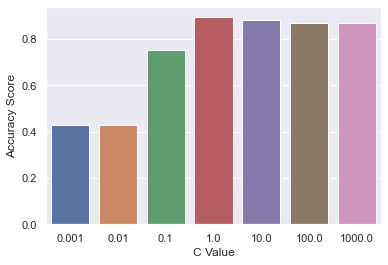

In [106]:
sns.barplot(data=df_c, x="C Value", y="Accuracy Score")

### Normalization Parameter (C Value) Analysis Continued

Similar to the KNN algorithm we can see that as our C value grows the accuracy score increases... to a point before falling. Oour goal would be to find the max and stick with that because the max is the point where we are neither over nor underfitting.

### Kernel Parameter Analysis

Now I'm going to do the same for the kernel. I'm just going to iterate through the kernel types and see how my accuracy score differs for each kernel type. Note that for each Kernel that I am iterating through, every other hyperparameter will be the default. The default can be found in the full documentation found in the link above.

In [107]:
kernel_list = []
accuracy_scores = []
for k in ['linear', 'poly', 'rbf', 'sigmoid']:
    method = svm.SVC(C=c)
    method.fit(X_train, y_train)
    predictions = method.predict(X_test)
    a_score = str(round(accuracy_score(y_test, predictions),3))
    c_list.append(c)
    accuracy_scores.append(a_score)
ist)
df_k['Accuracy Score'] = accuracy_scores
df_k = df_k.rename(columns = {0:'Kernel Type'})
df_k['Accuracy Score'] = df_k['Accuracy Score'].astype(float)
df_k.head()


SyntaxError: unmatched ')' (Temp/ipykernel_15348/677043949.py, line 10)

<AxesSubplot:xlabel='Kernel Type', ylabel='Accuracy Score'>

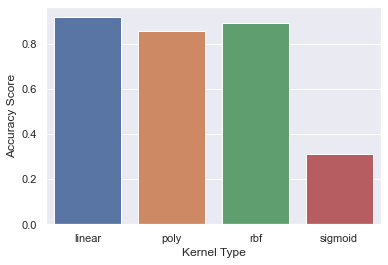

In [108]:
sns.barplot(data=df_k, x="Kernel Type", y="Accuracy Score")

### Kernel Parameter Analysis Continued

Linear, Poly, and RBF all had decent accuracy scores, sigmoid not so much. With the linear kernel type, the only other hyperparameter that has big affects on the algorithm and accuracy score is the C value. I will continue analysis on both the RBF and polynomial kernels. 

### RBF Kernel Analysis

Now I'm going to dig into the RBF kernel. For this the hyperparameter of interest is the gamma value. RBF is more complex and you can easily over and under fit your model. The solution to this is to do a 2D search for hyperparameter optimization changing both gamma and the normalizaiton parameter (C).

In [111]:
gamma_list = []
c_list = []
accuracy_scores = []

for g in [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8]:
    for c in [0.001, 0.01, 0.1, 1, 10, 100]:
        method = svm.SVC(C=c, kernel = 'rbf', gamma = g)
        method.fit(X_train, y_train)
        predictions = method.predict(X_test)
        a_score = str(round(accuracy_score(y_test, predictions),3))
        c_list.append(c)
        accuracy_scores.append(a_score)
        gamma_list.append(g)


df_g = pd.DataFrame(c_list)
df_g['Gamma'] = gamma_list
df_g['Accuracy Score'] = accuracy_scores
df_g = df_g.rename(columns = {0:'C Value'})
df_g.sort_values(by=['Accuracy Score'], ascending=False, inplace=True)

df_g.head(5)


,C Value,Gamma,Accuracy Score
34,10.0,0.6,0.917
4,10.0,0.1,0.917
5,100.0,0.1,0.917
11,100.0,0.2,0.905
15,1.0,0.3,0.905


### RBF Kernel Analysis Continued
After iterating through the chosen hyperparameters and sorting by highest accuracy score, it looks like there are a few combinations of gamma and c values that will give us very accurate models. The best RBF kernel has a better accuracy value than our best linear kernel.

### Polynomial Kernel Analysis

The final kernel is the polynomial kernel. The polynomial kernel has 3 hyperparameters in need of tuning, gamma, degree and C. I talk about C and gamma in previous entries, degree is just what degree of polynomial is being used in the kernel function. 

In [110]:
gamma_list = []
c_list = []
accuracy_scores = []
degree_list = []

for g in [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8]:
    for c in [0.001, 0.01, 0.1, 1, 10, 100]:
            for d in [2,3,4,5]:
                method = svm.SVC(C=c, kernel ='poly', degree=d, gamma = g)
                method.fit(X_train, y_train)
                predictions = method.predict(X_test)
                a_score = str(round(accuracy_score(y_test, predictions),3))
                c_list.append(c)
                accuracy_scores.append(a_score)
                gamma_list.append(g)
                degree_list.append(d)
df_p = pd.DataFrame(c_list)
df_p['Gamma'] = gamma_list
df_p['Degree'] = degree_list
df_p['Accuracy Score'] = accuracy_scores
df_p = df_p.rename(columns = {0:'C Value'})
df_p.sort_values(by=['Accuracy Score'], ascending=False, inplace=True)

df_p.head()

,C Value,Gamma,Degree,Accuracy Score
40,10.0,0.2,2,0.905
132,1.0,0.6,2,0.905
108,1.0,0.5,2,0.893
140,100.0,0.6,2,0.881
89,10.0,0.4,3,0.881


### Polynomial Kernel Analysis Continued

I ran through ~200 combinations for the polynomial kernel. Our best accuracy score is whith a low gamma, and degree of 2. A polynomial transformation is better than a linear transformation in this case but not as good as the rbf kernel.

## Conclusion

Thats SVM. Today you learned what SVM is and how it works. I went through strengths and weaknesses of the algorithm and did a short tutorial using the penguins dataset to explore the function of the SVM algorithm including its regularization parameter, kernel function, gamma and the degree of the polynomial kernel.

SVM is definitely a useful algorithm which is easy to grasp on the lower level but more difficult to understand once you add the parts that make it so useful, namely the kernel trick.